**BT4 : Adaptive Food Suggestion Engine**

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a707096f703d1ef33851481199c2746d45a6fe33f261a0d9ab53d0d4fef4158e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

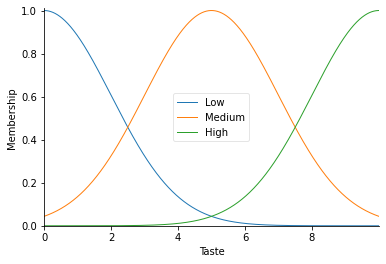

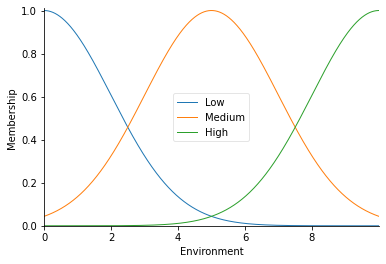

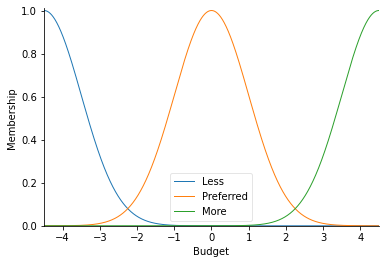

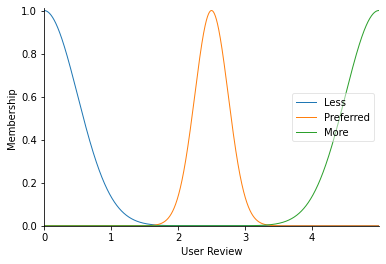

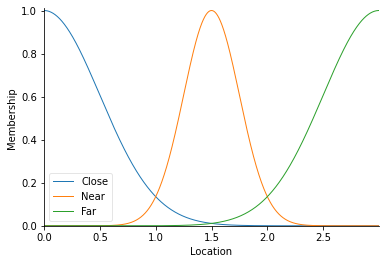

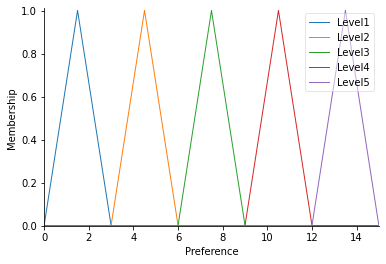

In [12]:
#input
taste          = ctrl.Antecedent(np.arange(0,10,0.001), 'Taste')
environment    = ctrl.Antecedent(np.arange(0,10,0.001), 'Environment')
budget         = ctrl.Antecedent(np.arange(-4.5,4.5,0.001), 'Budget')
userReview     = ctrl.Antecedent(np.arange(0,5,0.001), 'User Review')
location       = ctrl.Antecedent(np.arange(0,3,0.001), 'Location')
#output
preference     = ctrl.Consequent(np.arange(0,15,0.001), 'Preference')

#Gauss
taste['Low']               = fuzz.gaussmf(np.arange(0,10,0.001),0,2)
taste['Medium']            = fuzz.gaussmf(np.arange(0,10,0.001),5,2)
taste['High']              = fuzz.gaussmf(np.arange(0,10,0.001),10,2)

environment['Low']         = fuzz.gaussmf(np.arange(0,10,0.001),0,2)
environment['Medium']      = fuzz.gaussmf(np.arange(0,10,0.001),5,2)
environment['High']        = fuzz.gaussmf(np.arange(0,10,0.001),10,2)

budget['Less']             = fuzz.gaussmf(np.arange(-4.5,4.5,0.001),-4.5,1)
budget['Preferred']        = fuzz.gaussmf(np.arange(-4.5,4.5,0.001),0,1)
budget['More']             = fuzz.gaussmf(np.arange(-4.5,4.5,0.001),4.5,1)

userReview['Less']         = fuzz.gaussmf(np.arange(0,5,0.001),0,0.5)
userReview['Preferred']    = fuzz.gaussmf(np.arange(0,5,0.001),2.5,0.25)
userReview['More']         = fuzz.gaussmf(np.arange(0,5,0.001),5,0.5)

location['Close']          = fuzz.gaussmf(np.arange(0,3,0.001),0,0.5)
location['Near']           = fuzz.gaussmf(np.arange(0,3,0.001),1.5,0.25)
location['Far']            = fuzz.gaussmf(np.arange(0,3,0.001),3,0.5)

preference['Level1']       = fuzz.trimf(preference.universe,[0,1.5,3])
preference['Level2']       = fuzz.trimf(preference.universe,[3,4.5,6])
preference['Level3']       = fuzz.trimf(preference.universe,[6,7.5,9])
preference['Level4']       = fuzz.trimf(preference.universe,[9,10.5,12])
preference['Level5']       = fuzz.trimf(preference.universe,[12,13.5,15])

taste.view()
environment.view()
budget.view()
userReview.view()
location.view()
preference.view()

In [15]:
taste_value       = {1: 'Low', 2: 'Medium', 3: 'High'}
environment_value = {1: 'Low', 2: 'Medium', 3: 'High'}
budget_value      = {1: 'Less', 2: 'Preferred', 3: 'More'}
userReview_value  = {1: 'Less', 2: 'Preferred', 3: 'More'}
location_value    = {1: 'Close', 2: 'Near', 3: 'Far'}
preference_value  = {1: 'Level1', 2: 'Level2', 3: 'Level3', 4: 'Level4', 5: 'Level5'}

rule = []

i=0
f=0

def MakeRule(i):
    f1  = taste_value[val_taste[a]]
    f2  = environment_value[val_environment[b]]
    f3  = budget_value[val_budget[c]]
    f4  = userReview_value[val_userReview[d]]
    f5  = location_value[val_location[e]]
    pre  = preference_value[val_preference[f]]

    rule.append(ctrl.Rule(taste[f1] & environment[f2] & budget[f3] & userReview[f4] & location[f5], preference[pre] ))

val_taste             = [1,2,3]
val_environment       = [1,2,3]
val_budget            = [1,2,3]
val_userReview        = [1,2,3]
val_location          = [1,2,3]

val_preference        = [1,2,3,4,5]

for a in range(3):
    for b in range(3):
      for c in range(3):
        for d in range(3):
          for e in range(3):
              MakeRule(i)
              i += 1
              if((i%50)==0):
                f += 1

#Control system
pre_control = ctrl.ControlSystem(rule)
pre_simulation = ctrl.ControlSystemSimulation(pre_control)

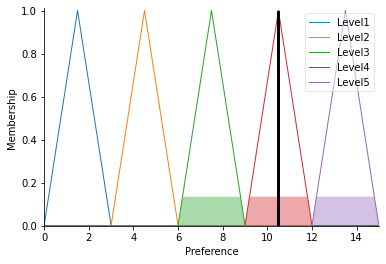

In [18]:
#Compute
pre_simulation.input['Taste'] = 8
pre_simulation.input['Environment'] = 8
pre_simulation.input['Budget'] = -4
pre_simulation.input['User Review'] = 1
pre_simulation.input['Location'] = 0.5

pre_simulation.compute()

# power
preference.view(sim = pre_simulation)